In [ ]:
import tensorflow as tf
import os
import json
import pandas as pd
import re
import numpy as np
import time
import matplotlib.pyplot as plt
import collections
import random
import requests
import json
from math import sqrt
from PIL import Image
from tqdm.auto import tqdm

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg19 import preprocess_input
from keras.applications.vgg19 import VGG19
import tensorflow as tf
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
wbc_path = "/content/drive/My Drive/bccd_wbc"

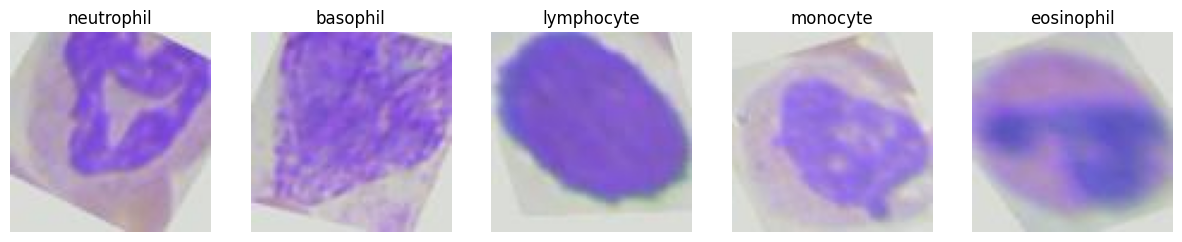

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Initialize Matplotlib figure and axis
fig, axs = plt.subplots(1, 5, figsize=(15, 3))

# Iterate over each subfolder (class)
for i, class_folder in enumerate(os.listdir(wbc_path)):
    class_folder_path = os.path.join(wbc_path, class_folder)

    # Check if it's a directory
    if os.path.isdir(class_folder_path):
        # Iterate over each file in the class folder
        for file_name in os.listdir(class_folder_path):
            # Construct the full file path
            file_path = os.path.join(class_folder_path, file_name)

            # Load the image using Matplotlib
            image = mpimg.imread(file_path)

            # Display the image in the corresponding subplot
            axs[i].imshow(image)
            axs[i].set_title(class_folder)
            axs[i].axis('off')
            break  # Show only the first image from each class
plt.show()

In [ ]:
import os
import cv2

# Define the main folder path
main_folder_path = "/content/drive/My Drive/bccd_wbc"

# Define the output folder path for equalized images
output_folder_path = "/content/drive/My Drive/equalized_images"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# Iterate over each subfolder (class)
for class_folder in os.listdir(main_folder_path):
    class_folder_path = os.path.join(main_folder_path, class_folder)

    # Check if it's a directory
    if os.path.isdir(class_folder_path):
        # Create a subfolder in the output directory for the class
        output_class_folder_path = os.path.join(output_folder_path, class_folder)
        if not os.path.exists(output_class_folder_path):
            os.makedirs(output_class_folder_path)

        # Iterate over each file in the class folder
        for file_name in os.listdir(class_folder_path):
            # Construct the full file path
            file_path = os.path.join(class_folder_path, file_name)

            # Read the image using OpenCV
            image = cv2.imread(file_path)

            # Convert the image to grayscale if it's in color
            if len(image.shape) > 2:
                gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            else:
                gray_image = image

            # Perform histogram equalization
            equalized_image = cv2.equalizeHist(gray_image)

            # Write the equalized image to the output folder
            output_file_path = os.path.join(output_class_folder_path, file_name)
            cv2.imwrite(output_file_path, equalized_image)


In [ ]:
import os
import cv2

# Define the main folder path
main_folder_path = "/content/drive/My Drive/equalized_images"

# Define the output folder path for filtered images
output_folder_path = "/content/drive/My Drive/filtered_images"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# Define the parameters for the Gaussian filter
kernel_size = (5, 5)  # Kernel size for blurring
sigma_x = 0  # Standard deviation in X direction

# Iterate over each subfolder (class)
for class_folder in os.listdir(main_folder_path):
    class_folder_path = os.path.join(main_folder_path, class_folder)

    # Check if it's a directory
    if os.path.isdir(class_folder_path):
        # Create a subfolder in the output directory for the class
        output_class_folder_path = os.path.join(output_folder_path, class_folder)
        if not os.path.exists(output_class_folder_path):
            os.makedirs(output_class_folder_path)

        # Iterate over each file in the class folder
        for file_name in os.listdir(class_folder_path):
            # Construct the full file path
            file_path = os.path.join(class_folder_path, file_name)

            # Read the image using OpenCV
            image = cv2.imread(file_path)

            # Apply Gaussian filter to the image
            filtered_image = cv2.GaussianBlur(image, kernel_size, sigma_x)

            # Write the filtered image to the output folder
            output_file_path = os.path.join(output_class_folder_path, file_name)
            cv2.imwrite(output_file_path, filtered_image)


In [ ]:
import os
import pandas as pd

data_path = "/content/drive/My Drive/filtered_images"

# Initialize empty lists to store file paths and labels
file_paths = []
labels = []

# Iterate over each subfolder (class)
for class_folder in os.listdir(data_path):
    class_folder_path = os.path.join(data_path, class_folder)

    # Check if it's a directory
    if os.path.isdir(class_folder_path):
        # Iterate over each file in the class folder
        for file_name in os.listdir(class_folder_path):
            # Construct the full file path
            file_path = os.path.join(class_folder_path, file_name)

            # Append the file path to the list
            file_paths.append(file_path)

            # Append the corresponding label to the list
            labels.append(class_folder)

# Create a DataFrame
df1 = pd.DataFrame({'image_path': file_paths, 'label': labels})

# Display the DataFrame
print(df1.head())


                                          image_path       label
0  /content/drive/My Drive/filtered_images/neutro...  neutrophil
1  /content/drive/My Drive/filtered_images/neutro...  neutrophil
2  /content/drive/My Drive/filtered_images/neutro...  neutrophil
3  /content/drive/My Drive/filtered_images/neutro...  neutrophil
4  /content/drive/My Drive/filtered_images/neutro...  neutrophil


In [ ]:
import pandas as pd

csv_file_path = "/content/drive/My Drive/final_df"

# Save the DataFrame as a CSV file
df1.to_csv(csv_file_path, index=False)

print("DataFrame saved as CSV successfully.")

DataFrame saved as CSV successfully.


In [ ]:
dataset_folder = "/content/drive/My Drive/filtered_images"

In [ ]:
train_folder = "/content/drive/My Drive/WBC_Training_dataset"
test_folder = "/content/drive/My Drive/WBC_Testing_dataset"

In [ ]:
import os
import shutil
import random

In [ ]:
train_ratio = 0.8  # 80% of data for training, 20% for testing

In [ ]:
for class_folder in os.listdir(dataset_folder):
    class_path = os.path.join(dataset_folder, class_folder)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        random.shuffle(images)

        # Split images into training and testing sets
        train_size = int(len(images) * train_ratio)
        train_images = images[:train_size]
        test_images = images[train_size:]

        # Move images to appropriate folders
        for image in train_images:
            src = os.path.join(class_path, image)
            dest = os.path.join(train_folder, class_folder, image)
            if not os.path.exists(os.path.join(train_folder, class_folder)):
                os.makedirs(os.path.join(train_folder, class_folder))
            shutil.copy(src, dest)

        for image in test_images:
            src = os.path.join(class_path, image)
            dest = os.path.join(test_folder, class_folder, image)
            if not os.path.exists(os.path.join(test_folder, class_folder)):
                os.makedirs(os.path.join(test_folder, class_folder))
            shutil.copy(src, dest)

In [ ]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                  horizontal_flip = True,
                                  rescale = 1./255,
                                  validation_split = 0.2,
                                  preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(rescale =1./255,
                                 validation_split = 0.2,
                                 preprocessing_function=preprocess_input)

In [ ]:
train_generator = train_datagen.flow_from_directory(directory = train_folder,
                                                   target_size = (224,224),
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical',
                                                    batch_size = 16,
                                                   subset = 'training')
validation_generator = test_datagen.flow_from_directory(directory = test_folder,
                                                       target_size = (224,224),
                                                       color_mode = 'rgb',
                                                       class_mode = 'categorical',
                                                       batch_size = 16,
                                                       subset = 'validation')

Found 2240 images belonging to 5 classes.
Found 140 images belonging to 5 classes.


In [ ]:
print(validation_generator.class_indices)
print(train_generator.class_indices)

{'basophil': 0, 'eosinophil': 1, 'lymphocyte': 2, 'monocyte': 3, 'neutrophil': 4}
{'basophil': 0, 'eosinophil': 1, 'lymphocyte': 2, 'monocyte': 3, 'neutrophil': 4}


In [ ]:
model = VGG19(include_top = False,weights = 'imagenet',input_shape= (224,224,3))

# Freeze the imported layers so they cannot be retrained.
for layer in model.layers:
    layer.trainable = False


model.summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

### Adding flattening and dense layers

Right now, our model is missing a top to actually classify our features. Let's add them:

In [ ]:
from keras import Sequential
from keras.layers import Dense
from keras.layers import Flatten

new_model = Sequential()
new_model.add(model)
new_model.add(Flatten())
new_model.add(Dense(5,activation = 'softmax'))

# Summarize.
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 5)                 125445    
                                                                 
Total params: 20149829 (76.87 MB)
Trainable params: 125445 (490.02 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
# Compile and fit the model. Use the Adam optimizer and crossentropical loss.
# Use the validation data argument during fitting to include your validation data.
optimizer = Adam(learning_rate = 0.0001)
new_model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
history = new_model.fit(train_generator,
                        epochs=10,
                        batch_size=16,
                        validation_data=validation_generator
                       )

Epoch 1/10
140/140 [==============================] - 769s 5s/step - loss: 1.4526 - accuracy: 0.3911 - val_loss: 1.2264 - val_accuracy: 0.5786
Epoch 2/10
140/140 [==============================] - 38s 273ms/step - loss: 1.2077 - accuracy: 0.5594 - val_loss: 1.1266 - val_accuracy: 0.5571
Epoch 3/10
140/140 [==============================] - 40s 284ms/step - loss: 1.0909 - accuracy: 0.5996 - val_loss: 0.9948 - val_accuracy: 0.5786
Epoch 4/10
140/140 [==============================] - 38s 269ms/step - loss: 1.0103 - accuracy: 0.6339 - val_loss: 0.9084 - val_accuracy: 0.7571
Epoch 5/10
140/140 [==============================] - 39s 278ms/step - loss: 0.9327 - accuracy: 0.6795 - val_loss: 0.8576 - val_accuracy: 0.7714
Epoch 6/10
140/140 [==============================] - 39s 277ms/step - loss: 0.9006 - accuracy: 0.6857 - val_loss: 0.8575 - val_accuracy: 0.6214
Epoch 7/10
140/140 [==============================] - 39s 277ms/step - loss: 0.8489 - accuracy: 0.7147 - val_loss: 0.7769 - val_accu

In [ ]:
final_validation_accuracy = history.history['val_accuracy'][-1]
print(final_validation_accuracy)

0.7714285850524902


In [ ]:
testing_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model on the testing dataset
testing_loss, testing_accuracy = new_model.evaluate(testing_generator)
print("Testing Accuracy:", testing_accuracy)


Found 700 images belonging to 5 classes.
44/44 [==============================] - 155s 4s/step - loss: 0.7700 - accuracy: 0.7457
Testing Accuracy: 0.7457143068313599


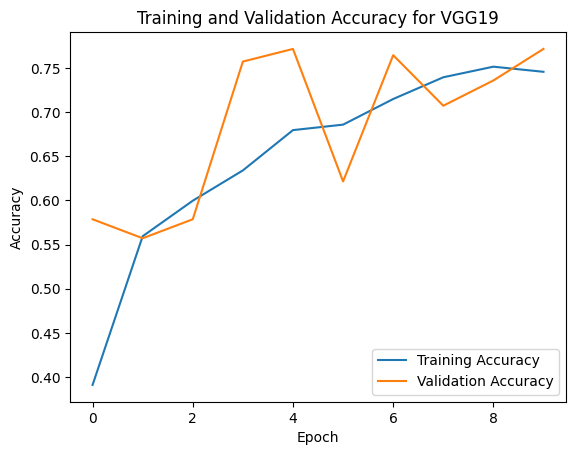

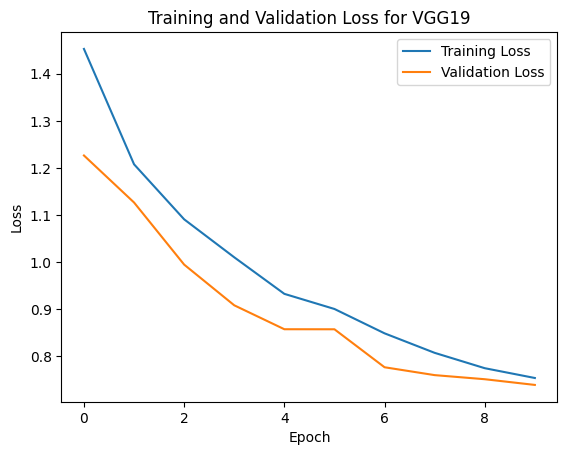

In [ ]:
import matplotlib.pyplot as plt

# Define the accuracy and loss values
train_accuracy = [0.3911, 0.5594, 0.5996, 0.6339, 0.6795, 0.6857, 0.7147, 0.7393, 0.7513, 0.7455]
val_accuracy = [0.5786, 0.5571, 0.5786, 0.7571, 0.7714, 0.6214, 0.7643, 0.7071, 0.7357, 0.7714]
train_loss = [1.4526, 1.2077, 1.0909, 1.0103, 0.9327, 0.9006, 0.8489, 0.8075, 0.7749, 0.7541]
val_loss = [1.2264, 1.1266, 0.9948, 0.9084, 0.8576, 0.8575, 0.7769, 0.7602, 0.7515, 0.7394]

# Plot training and validation accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for VGG19')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for VGG19')
plt.legend()
plt.show()
